# Laboratoire Wine Dataset - SVM & KPPV

Exploration, modélisation avec SVM et K-Nearest Neighbors sur le dataset Wine de sklearn.

In [25]:
# Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [26]:
# 1. Chargement des données
wine = load_wine()
X = wine.data
y = wine.target
features = wine.feature_names
target_names = wine.target_names

# Conversion en DataFrame pour exploration
df = pd.DataFrame(X, columns=features)
df['target'] = y

print("Aperçu des données :")
df.head()

Aperçu des données :


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [27]:
# 2. Exploration et visualisation
print("\nDescription statistique :")
df.describe()


Description statistique :


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


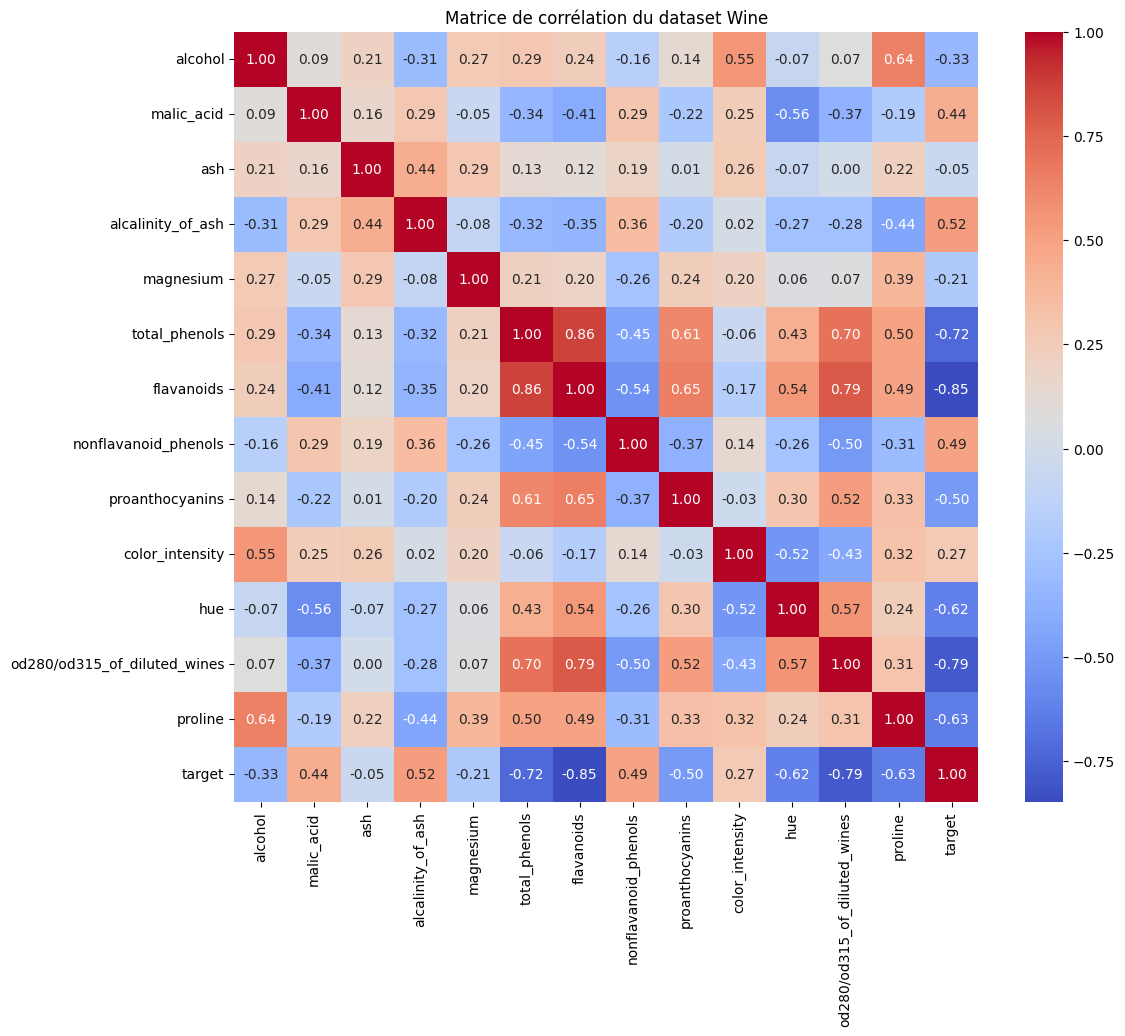

In [28]:
# Visualisation matrice de corrélation
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation du dataset Wine")
plt.show()

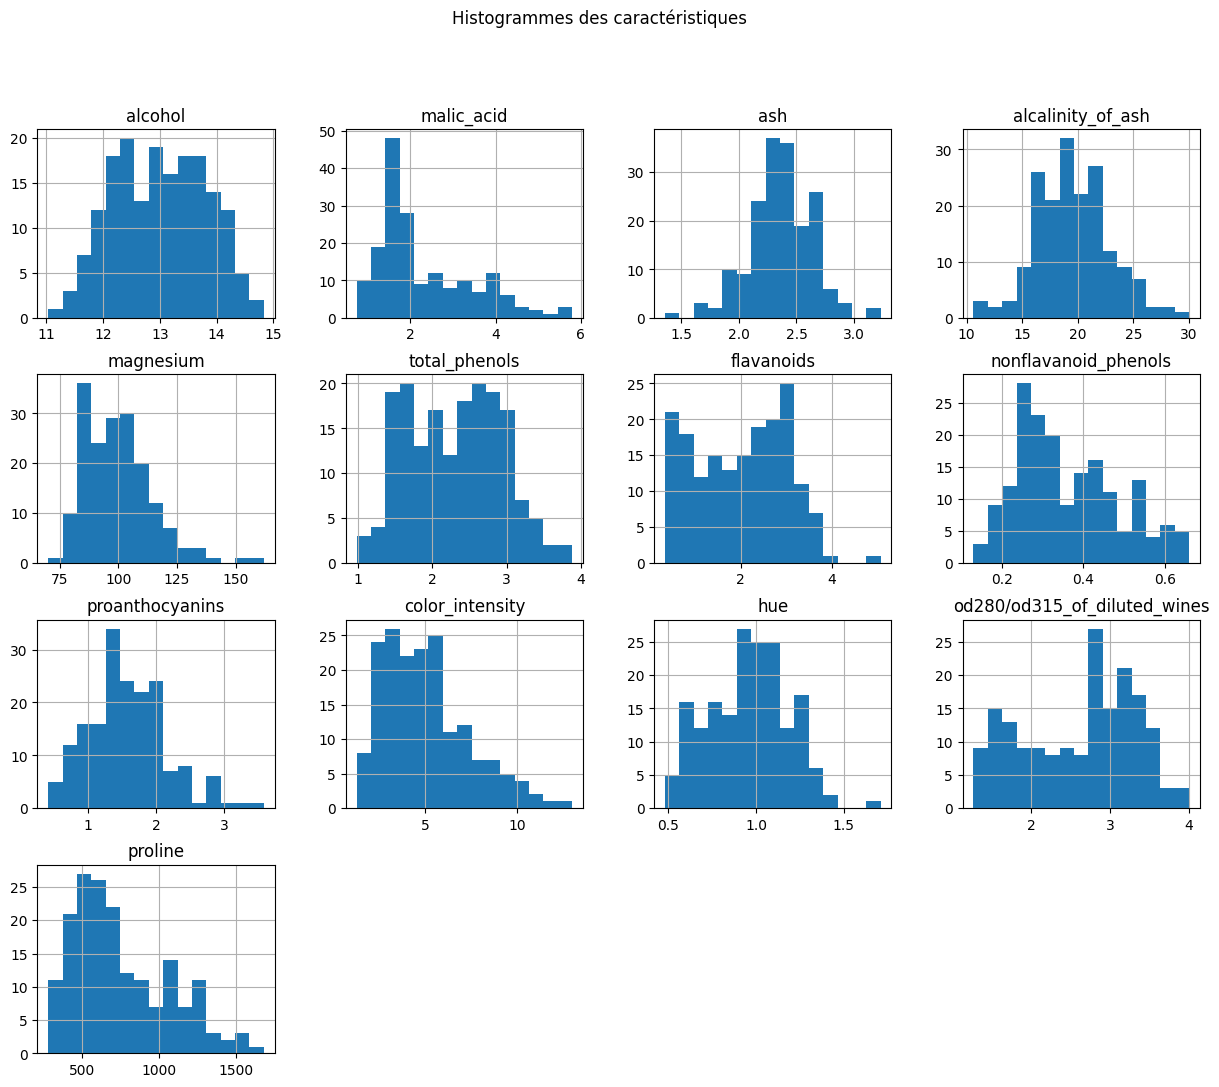

In [29]:
# Histogrammes des variables par classe
df.hist(column=features, figsize=(15,12), bins=15)
plt.suptitle("Histogrammes des caractéristiques")
plt.show()

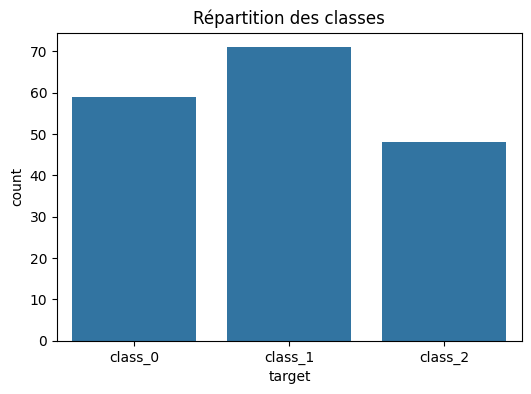

In [30]:
# Distribution des classes
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title("Répartition des classes")
plt.xticks(ticks=[0,1,2], labels=target_names)
plt.show()

In [31]:
# 3. Préparation des données : séparation train/test et normalisation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# 4. Application du modèle SVM
svm_clf = SVC(kernel='rbf', random_state=42)
svm_clf.fit(X_train_scaled, y_train)
y_pred_svm = svm_clf.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy SVM sur test : {acc_svm:.3f}")

Accuracy SVM sur test : 1.000


In [33]:
# 5. Test de KPPV avec k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train_scaled, y_train)
y_pred_knn5 = knn_5.predict(X_test_scaled)
acc_knn5 = accuracy_score(y_test, y_pred_knn5)
print(f"Accuracy KPPV (k=5) sur test : {acc_knn5:.3f}")

Accuracy KPPV (k=5) sur test : 1.000


In [34]:
# 6. Recherche de la meilleure valeur de k
ks = range(1, 21)
accuracies = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

best_k = ks[np.argmax(accuracies)]
best_acc = max(accuracies)

print(f"Meilleur k : {best_k} avec accuracy = {best_acc:.3f}")

Meilleur k : 1 avec accuracy = 1.000


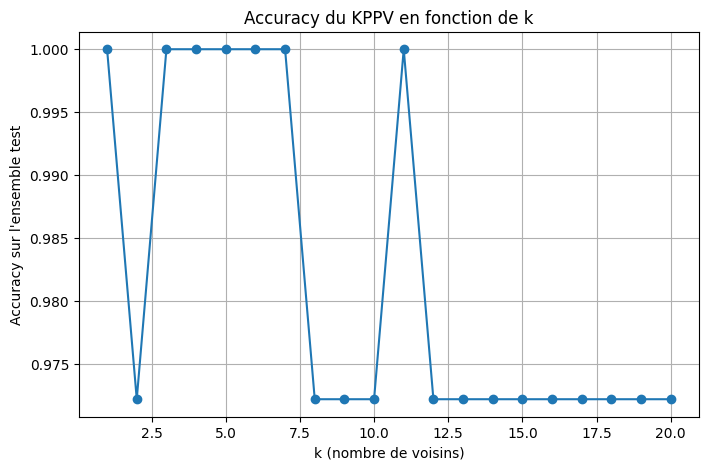

In [35]:
# Visualisation de l'accuracy selon k
plt.figure(figsize=(8,5))
plt.plot(ks, accuracies, marker='o')
plt.title("Accuracy du KPPV en fonction de k")
plt.xlabel("k (nombre de voisins)")
plt.ylabel("Accuracy sur l'ensemble test")
plt.grid(True)
plt.show()